In [140]:
x_resistance = [10, 15, 20, 30, 39, 51, 62, 75, 91, 100]

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Function to calculate mean, standard deviation, and 90% confidence interval
def calculate_stats(block):
    mean_value = np.mean(block)
    std_dev = np.std(block)
    confidence_interval = stats.norm.interval(0.95, loc=mean_value, scale=std_dev/np.sqrt(len(block)))
    return mean_value, std_dev, confidence_interval

def analyze(filename):
    # Read the current measurements from the text file
    with open(filename, 'r') as file:
        data = [float(line.strip()) / 10 for line in file]

    # Divide the data into 10 blocks of 100 readings each
    blocks = [data[i:i+100] for i in range(0, 1000, 100)]

    # Calculate stats for each block and filter outliers
    block_stats = []
    filtered_blocks = []

    for block in blocks:
        mean, std_dev, confidence_interval = calculate_stats(block)
        outliers = [value for value in block if value < confidence_interval[0] or value > confidence_interval[1]]
        filtered_block = [value for value in block if value not in outliers]

        filtered_blocks.append(filtered_block)
        #mean, std_dev, confidence_interval = calculate_stats(filtered_block)
        
        block_stats.append((mean, std_dev, confidence_interval))

    # Plotting the summary plot
    means = [stats[0] for stats in block_stats]
    std_devs = [stats[1] for stats in block_stats]
    confidence_intervals = [(stats[2][1] - stats[2][0]) / 2 for stats in block_stats]



    print('Mean Values:', means)
    print('Standard Deviations:', std_devs)
    print('Confidence Intervals:', confidence_intervals)

    plt.errorbar(range(1, 11), means, yerr=confidence_intervals, fmt='o', capsize=5)
    plt.title(f'Mean Currents, {filename.split()[0]} @ 2V with 95% Confidence Intervals')
    plt.xlabel('Sample Number')
    plt.ylabel('Mean Current (mA)')
    #plt.ylim(0, 250)
    plt.savefig(f'{filename.split()[0]}_2v_summary.png')
    plt.show()

    return block_stats

In [142]:
def combine(data):
    # Number of samples per resistor value
    num_samples = len(data[0])

    sample_means = [stats[0] for stats in data]
    sample_std_devs = [stats[1] for stats in data]

    # Calculate overall mean and standard deviation
    overall_mean = np.mean(sample_means)
    overall_std_dev = np.mean(sample_std_devs)

    # Calculate confidence interval for the overall mean
    mean_ci = stats.t.interval(0.95, df=num_samples - 1, loc=overall_mean, scale=stats.sem(sample_means))

    print("----------------------------------------")
    print(f"  Mean: {overall_mean}")
    print(f"  Standard Deviation: {overall_std_dev}")
    print(f"  95% Confidence Interval: {mean_ci}")
    print()

    return [(overall_mean, overall_std_dev, mean_ci)]

In [143]:
data_y = []

Mean Values: [233.12300000000002, 232.408, 233.345, 237.075, 240.232, 238.90099999999998, 238.643, 240.11700000000002, 240.263, 240.245]
Standard Deviations: [17.027341865364658, 16.11220456672519, 17.142300749899356, 19.11543551688007, 21.91103320247587, 20.11261044717965, 19.800637641247818, 19.996604986847142, 19.81187348536226, 20.85829990675175]
Confidence Intervals: [3.3372976808565795, 3.1579340662323148, 3.359829208195663, 3.7465565161882637, 4.2944835940914174, 3.941999211155604, 3.8808536647773906, 3.919262558729457, 3.8830558497573975, 4.0881516595968606]


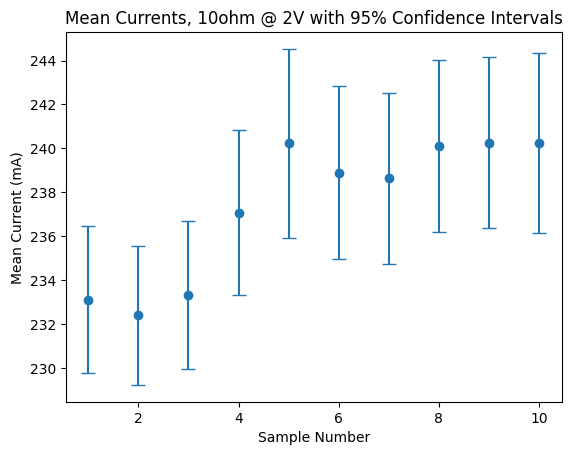

----------------------------------------
  Mean: 237.43519999999998
  Standard Deviation: 19.18883423687338
  95% Confidence Interval: (233.00905933589388, 241.86134066410608)



In [144]:
data_y.append(combine(analyze('10ohm 2v.txt')))

Mean Values: [157.572, 158.045, 157.775, 158.015, 157.65999999999997, 157.768, 157.62400000000002, 157.616, 157.722, 157.83899999999997]
Standard Deviations: [10.466165295847375, 11.392255044546712, 10.971247650107987, 11.258511224846735, 10.72388921986795, 10.246627542757667, 10.975491970750104, 10.936075347216661, 10.64413998404756, 11.17310068870768]
Confidence Intervals: [2.0513307036103754, 2.23284095900064, 2.1503250259681295, 2.20662765202394, 2.101843664513865, 2.0083020946801184, 2.151156897527869, 2.1434313812760877, 2.086213101513607, 2.1898874945506748]


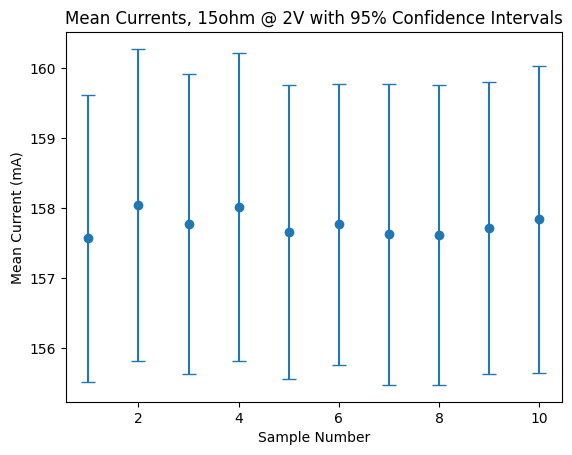

----------------------------------------
  Mean: 157.76359999999997
  Standard Deviation: 10.878750396869641
  95% Confidence Interval: (157.54202828406395, 157.985171715936)



In [145]:
data_y.append(combine(analyze('15ohm 2v.txt')))

Mean Values: [115.37599999999996, 115.78200000000002, 115.78099999999999, 115.54699999999998, 115.772, 115.46400000000001, 115.928, 115.20900000000002, 115.65799999999999, 115.44900000000001]
Standard Deviations: [4.935101214767534, 4.911443372370285, 5.024653122355811, 5.059317246427626, 4.856234755445828, 4.871766004232963, 5.0631428974501596, 4.389740197323754, 4.77424716578436, 4.880194565793458]
Confidence Intervals: [0.9672620641004244, 0.9626252121953769, 0.9848139154624107, 0.9916079589360436, 0.951804522114557, 0.9548485909403155, 0.9923577727582114, 0.8603732688242332, 0.935735249822983, 0.9565005586503332]


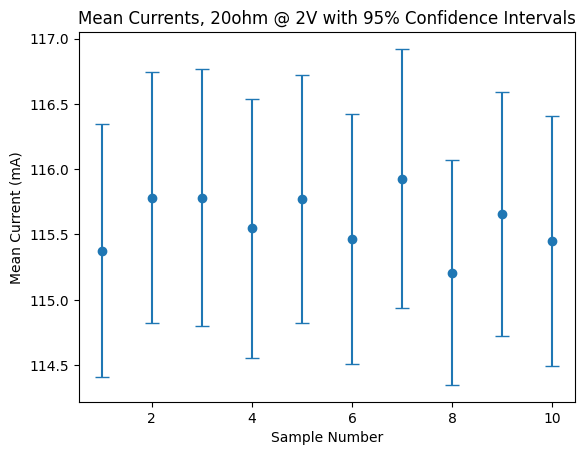

----------------------------------------
  Mean: 115.59660000000001
  Standard Deviation: 4.8765840541951775
  95% Confidence Interval: (115.29118761855149, 115.90201238144853)



In [146]:
data_y.append(combine(analyze('20ohm 2v.txt')))

Mean Values: [72.33699999999999, 72.389, 72.181, 72.19500000000001, 72.196, 72.33800000000001, 72.23800000000001, 72.241, 72.28299999999999, 72.38]
Standard Deviations: [1.1059525306268807, 1.1943110984998837, 1.6089558726080706, 1.3696258613212593, 1.535572857275095, 1.244329538345852, 1.2841168171159512, 1.3507845868235244, 1.388024135236848, 1.373317152008232]
Confidence Intervals: [0.21676271286396798, 0.23408067393962995, 0.31534955630260697, 0.26844173604843036, 0.300966749589648, 0.24388410800571592, 0.2516822713489404, 0.2647489141045867, 0.2720477314736627, 0.26916521572871943]


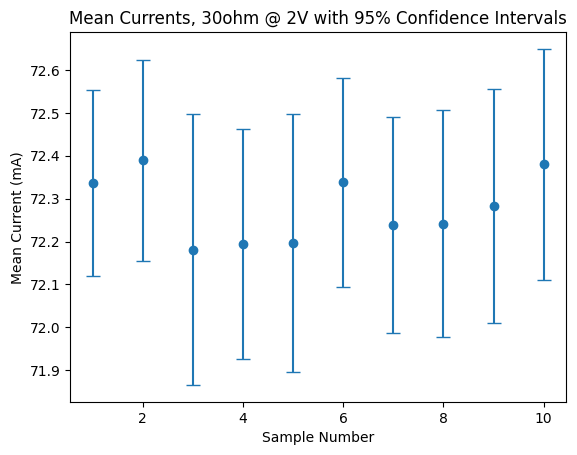

----------------------------------------
  Mean: 72.2778
  Standard Deviation: 1.3454990449861595
  95% Confidence Interval: (72.17064407717847, 72.38495592282153)



In [147]:
data_y.append(combine(analyze('30ohm 2v.txt')))

Mean Values: [52.243, 52.54599999999999, 52.72399999999999, 52.558, 52.214000000000006, 52.631, 52.726000000000006, 52.676, 52.46500000000001, 52.643]
Standard Deviations: [4.637914509776997, 4.427649940995788, 4.260284497542388, 4.421429180706166, 4.679252504407088, 4.239049303794425, 4.160928261818508, 4.251190891973683, 4.434622306352594, 4.347372884858164]
Confidence Intervals: [0.9090145402538639, 0.8678034420502669, 0.835000417907743, 0.8665841954378521, 0.917116638320671, 0.8308383964126662, 0.8155269535419123, 0.8332181039673117, 0.8691700005489054, 0.8520694281687966]


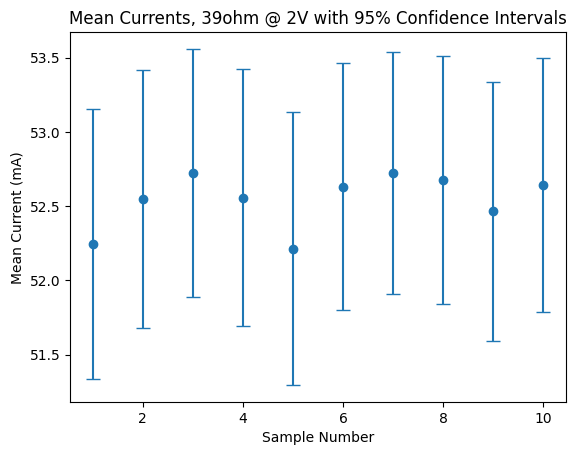

----------------------------------------
  Mean: 52.54260000000001
  Standard Deviation: 4.38596942822258
  95% Confidence Interval: (52.29161585797327, 52.793584142026745)



In [148]:
data_y.append(combine(analyze('39ohm 2v.txt')))

Mean Values: [39.11699999999999, 38.966, 39.019, 38.759, 39.216, 39.065, 38.92999999999999, 38.716, 38.90299999999999, 39.03099999999999]
Standard Deviations: [4.901225459005126, 4.928797419249446, 5.060902982670187, 5.2469247183469285, 4.703843534812781, 4.971164350531976, 5.184582914757946, 5.17535931119763, 5.175470123573316, 5.058985965586383]
Confidence Intervals: [0.9606225379760858, 0.9660265428822896, 0.991918757528488, 1.028378347755293, 0.9219363917144605, 0.9743303088272128, 1.0161595787787263, 1.0143517857001356, 1.0143735045266737, 0.9915430290842906]


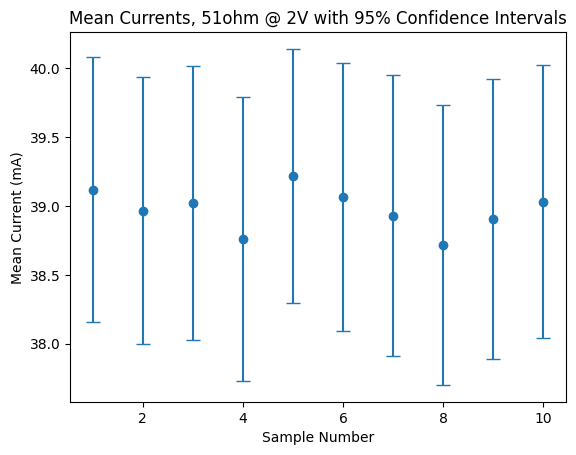

----------------------------------------
  Mean: 38.9722
  Standard Deviation: 5.040725677973172
  95% Confidence Interval: (38.76319478379202, 39.181205216207985)



In [149]:
data_y.append(combine(analyze('51ohm 2v.txt')))

Mean Values: [30.49299999999999, 30.574000000000005, 30.629, 30.524, 30.229, 30.338, 30.304999999999996, 30.075, 29.432000000000002, 29.588]
Standard Deviations: [4.315281103242291, 4.280294849656972, 4.169803232767705, 4.257231964551615, 4.60272299839997, 4.491253277204482, 4.524143565361294, 4.771527533191022, 5.060056916675938, 4.913436272101227]
Confidence Intervals: [0.8457795545521165, 0.8389223748539933, 0.8172664158843403, 0.8344021324353861, 0.9021171307678166, 0.8802694668768289, 0.8867158448996761, 0.9352022116295657, 0.9917529316407645, 0.9630158133651143]


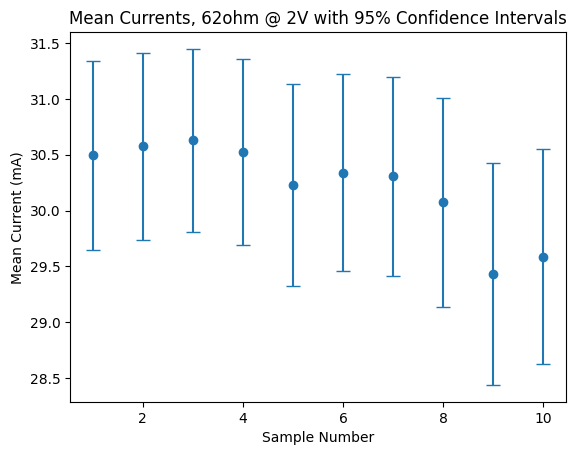

----------------------------------------
  Mean: 30.218700000000002
  Standard Deviation: 4.538575171315252
  95% Confidence Interval: (29.65914407913904, 30.778255920860964)



In [150]:
data_y.append(combine(analyze('62ohm 2v.txt')))

Mean Values: [22.936999999999998, 22.572000000000006, 22.842999999999996, 22.832000000000004, 22.673, 22.747000000000003, 22.475999999999996, 22.879000000000005, 22.736000000000004, 22.699000000000005]
Standard Deviations: [4.965473894806013, 5.273140999442363, 4.812426726714912, 4.9168664818154255, 5.099428497390663, 4.867287848484, 5.212180349911159, 4.862474575769008, 4.997869946287119, 5.031431108541585]
Confidence Intervals: [0.9732149999993602, 1.0335166444308577, 0.9432183062599222, 0.9636881221150411, 0.999469619662289, 0.9539708885418072, 1.0215685766753246, 0.9530275044248917, 0.9795645094137875, 0.9861423763435937]


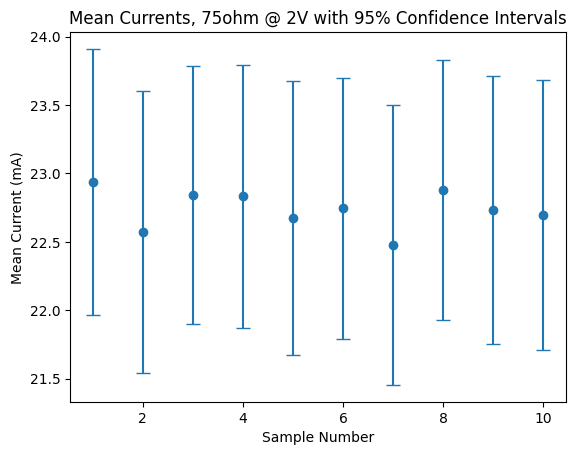

----------------------------------------
  Mean: 22.7394
  Standard Deviation: 5.0038580429162245
  95% Confidence Interval: (22.546256948332683, 22.932543051667317)



In [151]:
data_y.append(combine(analyze('75ohm 2v.txt')))

Mean Values: [19.144000000000002, 19.224, 19.212, 19.179, 19.084, 18.811, 19.038, 18.894, 18.488000000000003, 18.372]
Standard Deviations: [3.6748420374214725, 3.6098232643718164, 3.609744589302684, 3.6889915966290845, 3.9497777152644935, 4.161175194581454, 3.84041091551412, 4.013148888341922, 4.136381993965258, 4.176603404681847]
Confidence Intervals: [0.7202558042219884, 0.7075123588723571, 0.7074969388421586, 0.7230290668663919, 0.7741422068857311, 0.8155753514741093, 0.7527067080242169, 0.7865627285747117, 0.8107159734471878, 0.8185992250883771]


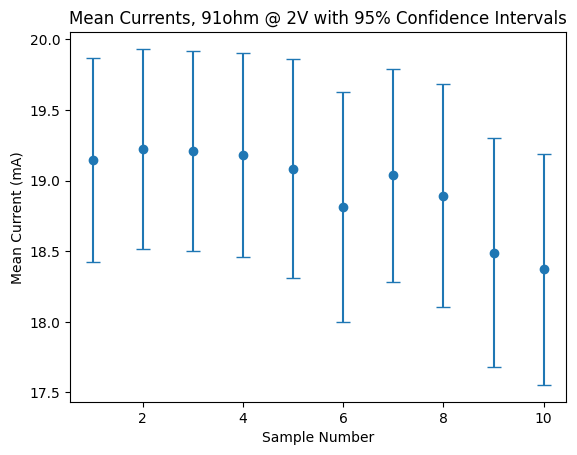

----------------------------------------
  Mean: 18.9446
  Standard Deviation: 3.8860899600074155
  95% Confidence Interval: (18.53160749203314, 19.357592507966864)



In [152]:
data_y.append(combine(analyze('91ohm 2v.txt')))

Mean Values: [16.631999999999998, 16.624000000000002, 16.57, 16.464999999999996, 16.428, 16.652, 16.449, 16.371, 16.56, 16.654999999999998]
Standard Deviations: [3.8312368759970976, 3.737863560912838, 3.74468957324903, 3.8628325099594982, 3.944973510684197, 3.889922364263842, 3.877073509749332, 4.002931300934354, 3.9096035604649226, 3.7911047202629473]
Confidence Intervals: [0.750908629319607, 0.7326077958513793, 0.7339456696850766, 0.7571012597831084, 0.7732006000905569, 0.7624107736614034, 0.7598924444522988, 0.7845601182419406, 0.7662682172340816, 0.7430428713335182]


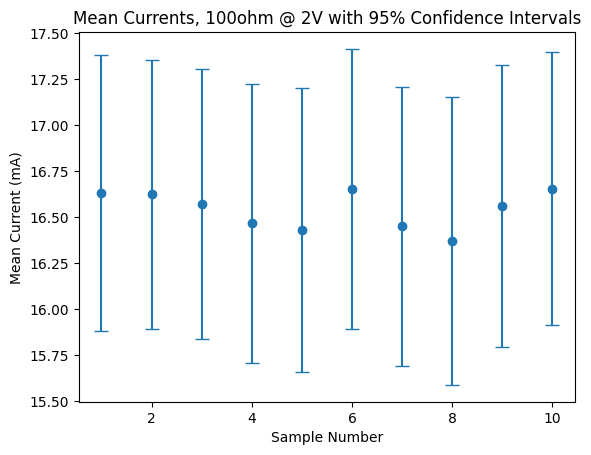

----------------------------------------
  Mean: 16.5406
  Standard Deviation: 3.859223148647806
  95% Confidence Interval: (16.398912368765604, 16.6822876312344)



In [153]:
data_y.append(combine(analyze('100ohm 2v.txt')))

In [154]:
#x_values = list(np.repeat(x_resistance, 1))
x_values = x_resistance 

y_expected = [(2 / resistance) * 1000 for resistance in x_resistance]
y_expected1 = [(2 / resistance) * 1000 for resistance in x_values]

means = []
std_devs = []
confidence_intervals = []

for i in range(len(data_y)):
    means += [data_y[i][j][0] for j in range(len(data_y[i]))]
    std_devs += [data_y[i][j][1] for j in range(len(data_y[i]))]
    confidence_intervals += [data_y[i][j][2] for j in range(len(data_y[i]))]

print('Mean Values:', means)
print(data_y)

Mean Values: [237.43519999999998, 157.76359999999997, 115.59660000000001, 72.2778, 52.54260000000001, 38.9722, 30.218700000000002, 22.7394, 18.9446, 16.5406]
[[(237.43519999999998, 19.18883423687338, (233.00905933589388, 241.86134066410608))], [(157.76359999999997, 10.878750396869641, (157.54202828406395, 157.985171715936))], [(115.59660000000001, 4.8765840541951775, (115.29118761855149, 115.90201238144853))], [(72.2778, 1.3454990449861595, (72.17064407717847, 72.38495592282153))], [(52.54260000000001, 4.38596942822258, (52.29161585797327, 52.793584142026745))], [(38.9722, 5.040725677973172, (38.76319478379202, 39.181205216207985))], [(30.218700000000002, 4.538575171315252, (29.65914407913904, 30.778255920860964))], [(22.7394, 5.0038580429162245, (22.546256948332683, 22.932543051667317))], [(18.9446, 3.8860899600074155, (18.53160749203314, 19.357592507966864))], [(16.5406, 3.859223148647806, (16.398912368765604, 16.6822876312344))]]


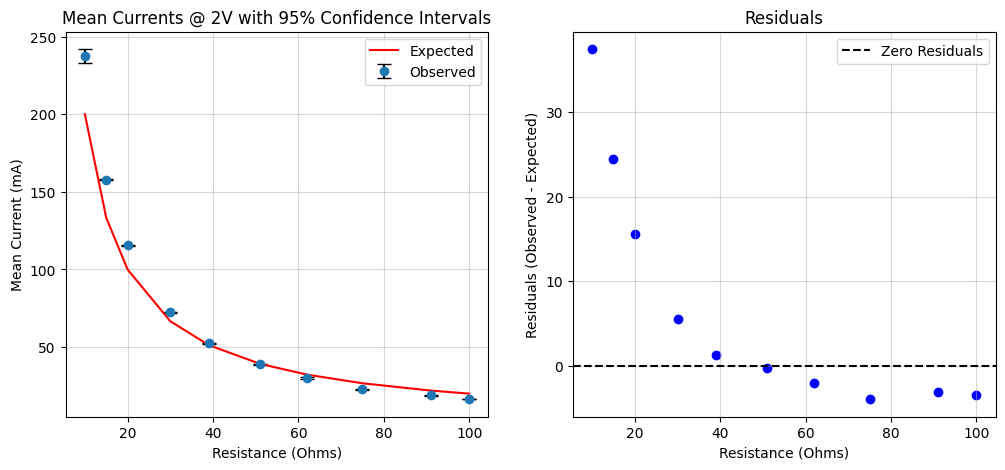

In [155]:
# Extract the lower and upper bounds of the confidence intervals
lower_bounds = [ci[0] for ci in confidence_intervals]
upper_bounds = [ci[1] for ci in confidence_intervals]

# Calculate the error bars correctly
lower_error = [mean - lower for mean, lower in zip(means, lower_bounds)]
upper_error = [upper - mean for mean, upper in zip(means, upper_bounds)]

# Plotting the summary plot
plt.figure(figsize=(12, 5))

# Plotting the main plot
plt.subplot(1, 2, 1)
plt.errorbar(x_values, means, yerr=[lower_error, upper_error], fmt='o', capsize=5, label='Observed', ecolor='black')
plt.plot(x_resistance, y_expected, 'r-', label='Expected', marker='')
plt.title('Mean Currents @ 2V with 95% Confidence Intervals')
plt.xlabel('Resistance (Ohms)')
plt.ylabel('Mean Current (mA)')
plt.legend()

plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.5)

# Calculate residuals
residuals = np.array(means) - np.array(y_expected)

# Plotting the residuals subplot
plt.subplot(1, 2, 2)
plt.scatter(x_values, residuals, marker='o', color='blue')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Residuals')
plt.title('Residuals')
plt.xlabel('Resistance (Ohms)')
plt.ylabel('Residuals (Observed - Expected)')
plt.legend()

plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.5)

plt.savefig('graph_vconst_base.png')
plt.show()

In [156]:
from sklearn.metrics import mean_squared_error, r2_score

# Testing for the goodness of fit using the chi-squared test
mse = mean_squared_error(means, y_expected1)
print(f'Mean Squared Error (MSE): {mse}')

r_squared = r2_score(means, y_expected1)
print(f'R-squared: {r_squared}')

Mean Squared Error (MSE): 231.5370674282587
R-squared: 0.9517350591250726


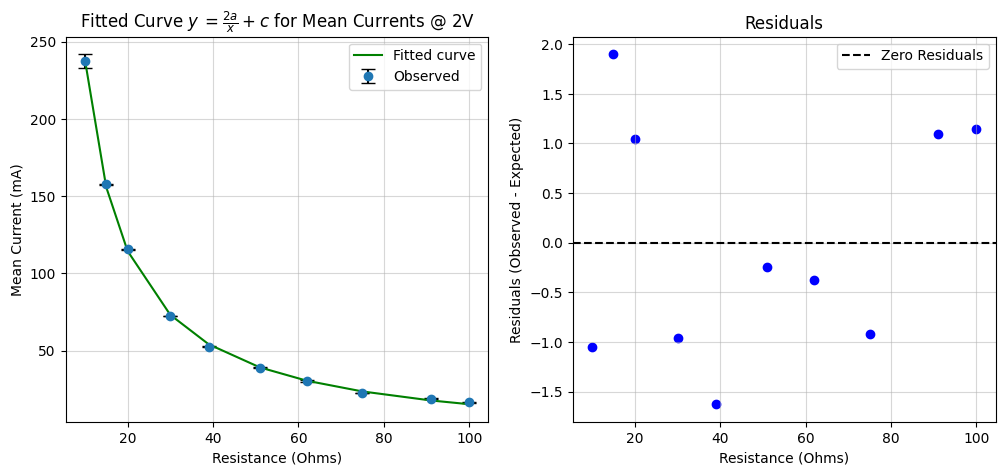

Fitted parameters: a=1.2393985838010886 c=-9.388948900526534


In [162]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

y_values = sorted(means, reverse=True)

# Define the function to fit
def inverse_function(x, a, c):
    return (2 * a) / (x / 1000) + c

# Perform curve fitting
params, covariance = curve_fit(inverse_function, x_values, y_values)

# Extract the fitted parameter(s)
a_fit = params[0]
c_fit = params[1]

# Generate fitted curve for plotting
x_values_interp = scipy.interpolate.interp1d(np.arange(len(x_values)), x_values)
x_values_stretch = x_values_interp(np.linspace(0, len(x_values)-1, 10))

x_fit = x_values_stretch
y_fit = inverse_function(x_fit, a_fit, c_fit)

# Plotting the summary plot
plt.figure(figsize=(12, 5))

# Plotting the main plot
plt.subplot(1, 2, 1)
plt.errorbar(x_values, means, yerr=[lower_error, upper_error], fmt='o', capsize=5, label='Observed', ecolor='black')
plt.plot(x_fit, y_fit, 'g-', label='Fitted curve', marker='')
plt.title('Fitted Curve $y_ = \\frac{2a}{x} + c$ for Mean Currents @ 2V')
plt.xlabel('Resistance (Ohms)')
plt.ylabel('Mean Current (mA)')
plt.legend()

plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.5)

# Calculate residuals
residuals = np.array(means) - np.array(y_fit)

# Plotting the residuals subplot
plt.subplot(1, 2, 2)
plt.scatter(x_values, residuals, marker='o', color='blue')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Residuals')
plt.title('Residuals')
plt.xlabel('Resistance (Ohms)')
plt.ylabel('Residuals (Observed - Expected)')
plt.legend()

plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.5)

plt.savefig('graph_vconst_fit.png')
plt.show()

# Display the fitted parameter(s)
print(f'Fitted parameters: a={a_fit} c={c_fit}')

In [158]:
print('Mean Values:', y_values)
print('Fit:', y_fit)

mse = mean_squared_error(y_values, y_fit)
print(f'Mean Squared Error (MSE): {mse}')

r_squared = r2_score(y_values, y_fit)
print(f'R-squared: {r_squared}')

Mean Values: [237.43519999999998, 157.76359999999997, 115.59660000000001, 72.2778, 52.54260000000001, 38.9722, 30.218700000000002, 22.7394, 18.9446, 16.5406]
Fit: [238.49076786 155.86419561 114.55090948  73.23762335  54.16995283
  39.21491713  30.59165058  23.66168     17.85058041  15.39902278]
Mean Squared Error (MSE): 1.293364888605936
R-squared: 0.9997303922841745


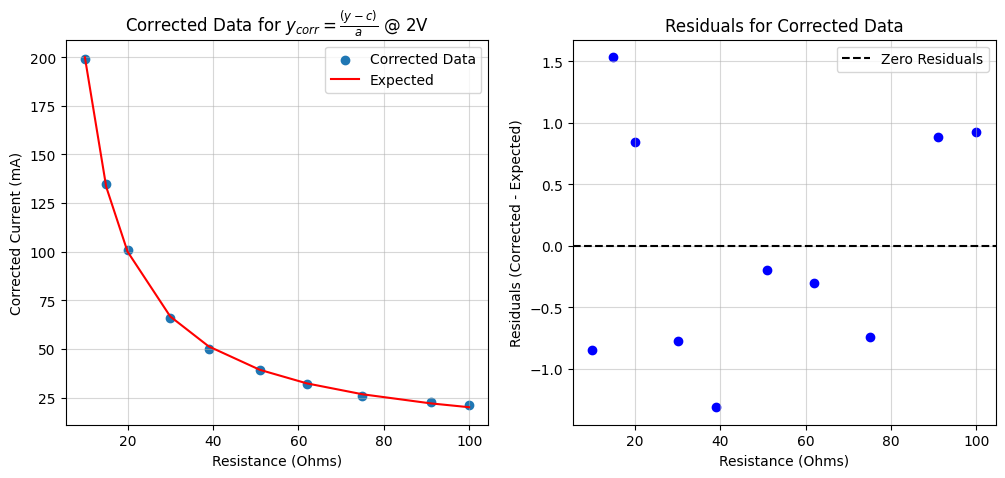

In [159]:
y_values_corrected = [(value - c_fit) / (a_fit) for value in y_values]

plt.figure(figsize=(12, 5))

# Plotting the main plot
plt.subplot(1, 2, 1)
plt.scatter(x_values, y_values_corrected, label='Corrected Data')
plt.plot(x_resistance, y_expected, 'r-', label='Expected', marker='')
plt.xlabel('Resistance (Ohms)')
plt.ylabel('Corrected Current (mA)')
plt.title('Corrected Data for $y_{corr} = \\frac{(y - c)}{a}$ @ 2V')
plt.legend()

plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.5)

# Calculate residuals for corrected data
residuals_corrected = np.array(y_values_corrected) - np.array(y_expected)

# Plotting the residuals subplot
plt.subplot(1, 2, 2)
plt.scatter(x_values, residuals_corrected, marker='o', color='blue')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Residuals')
plt.title('Residuals for Corrected Data')
plt.xlabel('Resistance (Ohms)')
plt.ylabel('Residuals (Corrected - Expected)')
plt.legend()

plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.5)

plt.savefig('graph_vconst_corrected.png')
plt.show()


In [160]:
mse = mean_squared_error(y_values_corrected, y_expected1)
print(f'Mean Squared Error (MSE): {mse}')

r_squared = r2_score(y_values_corrected, y_expected1)
print(f'R-squared: {r_squared}')

Mean Squared Error (MSE): 0.8419747656575403
R-squared: 0.9997303922841745
